# XG-Classifier

In [123]:
import os
import pandas as pd
folder_path=r'C:\Users\tempe\Desktop\Real World Data'
file_path=r'Iris.csv'
full_path=os.path.join(folder_path,file_path)
m=pd.read_csv(full_path)
print(m.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [124]:
drop=['Id']
m=m.drop(columns=drop)
print(m.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [125]:
print(m.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [126]:
m['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [127]:
m['Species'].value_counts(normalize=True)

Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

In [128]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
m['Species']=le.fit_transform(m['Species'])
print(m.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


In [129]:
X=m.drop(columns=['Species'])
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [130]:
y=m['Species']
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [133]:
from sklearn.pipeline import Pipeline

In [134]:
from xgboost import XGBClassifier

In [135]:
estimators = [
    ('clf', XGBClassifier(random_state=2)) # can customize objective function with the objective parameter
]

In [136]:
pipe=Pipeline(steps=estimators)

In [137]:
print(pipe)

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=No

In [138]:
pipe

,steps,"[('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None


In [139]:
from skopt import BayesSearchCV

In [140]:
from skopt.space import Real,Categorical,Integer

In [141]:
search_space={
    'clf__max_depth':Integer(2,4),
     'clf__n_estimators': Integer(20, 80), 
    'clf__learning_rate':Real(0.001,1.0,prior='log-uniform'),
    'clf__subsample':Real(0.5,1.0),
    'clf__colsample_bytree':Real(0.5,1.0),
    'clf__colsample_bynode':Real(0.5,1.0),
    'clf__colsample_bylevel':Real(0.5,1.0),
    'clf__reg_alpha':Real(0.0,10.0),
    'clf__reg_lambda':Real(0.0,10.0),
    'clf__gamma':Real(0.0,10.0)
}

In [142]:
opt=BayesSearchCV(pipe,search_space,cv=3,n_iter=50,scoring='roc_auc_ovr',random_state=2,n_jobs=-1)

In [143]:
opt.fit(X_train,y_train)

,estimator,"Pipeline(step...=None, ...))])"
,search_spaces,"{'clf__colsample_bylevel': Real(low=0.5,...m='normalize'), 'clf__colsample_bynode': Real(low=0.5,...m='normalize'), 'clf__colsample_bytree': Real(low=0.5,...m='normalize'), 'clf__gamma': Real(low=0.0,...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,50
,scoring,'roc_auc_ovr'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,3


In [144]:
opt.best_score_

np.float64(0.9924139646361869)

In [145]:
opt.score(X_test, y_test)

1.0

In [147]:
opt.predict(X_test)

array([0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2,
       0, 1, 1, 2, 2, 0, 1, 0])

In [149]:
opt.predict_proba(X_test)

array([[0.4872111 , 0.28476718, 0.22802171],
       [0.22359742, 0.3263208 , 0.45008177],
       [0.21927656, 0.3342038 , 0.44651967],
       [0.4872111 , 0.28476718, 0.22802171],
       [0.26165277, 0.39879024, 0.33955696],
       [0.21615636, 0.32944825, 0.4543954 ],
       [0.22722366, 0.32479668, 0.44797966],
       [0.22527036, 0.34333906, 0.43139052],
       [0.46513948, 0.29702425, 0.23783633],
       [0.5032464 , 0.27586225, 0.22089128],
       [0.26705623, 0.4070258 , 0.3259179 ],
       [0.26339716, 0.4014489 , 0.33515394],
       [0.29797596, 0.38985518, 0.31216887],
       [0.22359742, 0.3263208 , 0.45008177],
       [0.5032464 , 0.27586225, 0.22089128],
       [0.22722366, 0.32479668, 0.44797966],
       [0.26705623, 0.4070258 , 0.3259179 ],
       [0.49805424, 0.27874568, 0.22320011],
       [0.22359742, 0.3263208 , 0.45008177],
       [0.5032464 , 0.27586225, 0.22089128],
       [0.23776542, 0.36238304, 0.3998515 ],
       [0.23776542, 0.36238304, 0.3998515 ],
       [0.

In [151]:
opt.best_estimator_.steps

[('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.6557758169652637,
                colsample_bynode=0.8541701402265279,
                colsample_bytree=0.6321257581781894, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=4.303597917552343, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.032042559925194496,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=39, n_jobs=None,
                num_parallel_tree=None, ...))]

In [153]:
from xgboost import plot_importance

In [156]:
xgboost_step = opt.best_estimator_.steps[0]

In [160]:
xgboost_model = xgboost_step[1]

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

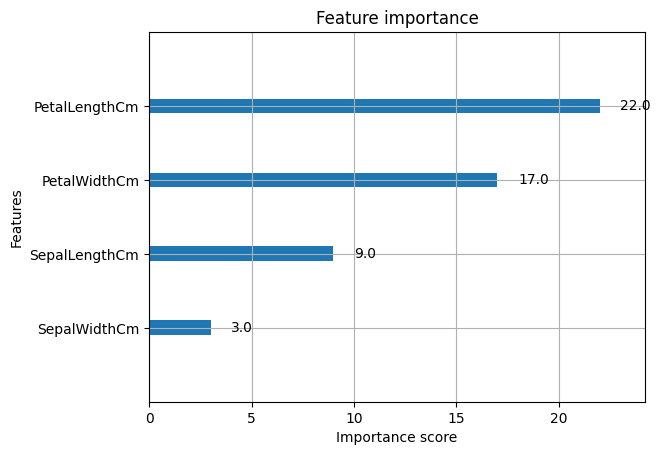

In [161]:
plot_importance(xgboost_model)